Based on a post @ [Towards Data Science](https://towardsdatascience.com/understanding-gradient-boosting-machines-using-xgboost-and-lightgbm-parameters-3af1f9db9700).

# Getting started with Gradient Boosting Machines — using XGBoost and LightGBM parameters

> "You know how with each passing day we aim to improve ourselves by focusing on the mistakes of yesterday. Well, you know what? — GBMs do that too!"

### 1. "An Ensemble of Predictors"

"GBMs do it by creating an **ensemble of predictors**. An army of predictors. Each one of those predictors is sequentially built by focusing on the mistakes of the predictor that came before it".

- "`boosting_type` ([LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-API.html)), `booster` ([XGBoost](https://xgboost.readthedocs.io/en/latest/python/index.html)): to select this predictor algorithm. Both of them provide you the option to choose from — `gbdt`, `dart`, `goss`, `rf` (LightGBM) or `gbtree`, `gblinear` or `dart` (XGBoost)".

> "But remember, a decision tree, almost always, outperforms the other options by a fairly large margin. The good thing is that it is the default setting for this parameter; so you don’t have to worry about it!"

### 2. "Improve upon the predictions made the previous predictors"

- "\[A\] GBM basically creates a lot of individual predictors and each of them tries to predict the true label. Then, it gives its final prediction by averaging all those individual predictions".
    - "But we aren’t talking about our normal 3rd-grade average over here; we mean a <u>weighted average</u>".
    - "GBM assigns a weight to each of the predictors which determines how much it contributes to the final result — higher the weight, greater its contribution".

- "Each predictor in the ensemble is built sequentially, one after the other — with each one focusing more on the mistakes of its predecessors".
    - "Each time a new predictor is trained, the algorithm assigns higher weights (from a new set of weights) to the training instances which the previous predictor got wrong".
    - "So, this new predictor, now, has more incentive to solve the more difficult predictions".

> "But unlike GBMs, the predictors built in Random Forest are independent of each other.

>> "They aren’t built sequentially but rather parallely. So, there are no weights for the predictors in Random Forest. They are all created equal".

>> "Random Forest is a bagging algorithm while Gradient Boosting Trees is a boosting algorithm".

> "How does the model decide the number of predictors to put in?"

> " Through a hyperparameter, of course":

- "`n_estimators`: We pass the number of predictors that we want the GBM to build inside the n_estimators parameter. The default number is 100".

### 3. "Weak Predictors"

"A **weak predictor** is a simple prediction model that just performs better than random guessing. Now, we want the individual predictors inside GBMs to be weak, so that the overall GBM model can be strong".

- "Since every predictor is going to focus on the observations that the one preceding it got wrong, when we use a weak predictor, these mislabelled observations tend to have some learnable information which the next predictor can learn".

- "Whereas, if the predictor were already strong, it would be likely that the mislabelled observations are just noise or nuances of that sample data. In such a case, the model will simply be overfitting to the training data".

> "So, 'creating a weak predictor'.. this seems like a good area to hyperparameterise, right?"

"These are the parameters that we need to tune to make the right predictors (as discussed before, <u>these simple predictors are decision trees</u>)":

- "`max_depth` (both XGBoost and LightGBM): This provides the maximum depth that each decision tree is allowed to have. A smaller value signifies a weaker predictor".

- "`min_split_gain` (LightGBM), `gamma` (XGBoost): Minimum loss reduction required to make a further partition on a leaf node of the tree. A lower value will result in deeper trees".

- "`num_leaves` (LightGBM): Maximum tree leaves for base learners. A higher value results in deeper trees".

- "`min_child_samples` (LightGBM): Minimum number of data points needed in a child (leaf) node. According to the LightGBM docs, this is a very important parameter to prevent overfitting".


In [1]:
from IPython.display import Image

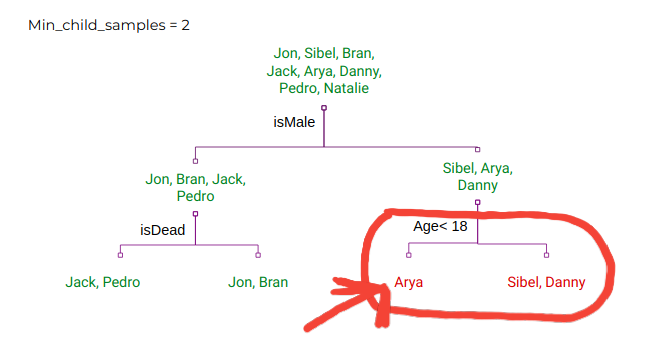

In [2]:
Image('./IMG/min-child-samples.png')

**Note 1**: "These are the parameters that you can tune to control overfitting".
**Note 2**: "Weak predictors vs. strong predictors — this is another point of difference between GBMs and Random Forests. The trees in Random Forest are all strong by themselves as they are built independently of each other".

***

#### Subsampling

"Even after tuning all the above parameters correctly, it might just happen that some trees in the ensemble are highly correlated".
- "To combat this problem, we subsample the data rows and columns before each iteration and train the tree on this subsample. Meaning that different trees are going to be trained on different subsamples of the entire dataset".

"These are the relevant parameters to look out for":

- "`subsample` (both XGBoost and LightGBM): This specifies the fraction of rows to consider at each subsampling stage. By default it is set to 1, which means no subsampling".

- "`colsample_bytree` (both XGBoost and LightGBM): This specifies the fraction of columns to consider at each subsampling stage. By default, it is set to 1, which means no subsampling".

- "`subsample_freq` (LightGBM): This specifies that bagging should be performed after every $k$ iterations. By default it is set to 0. So make sure that you set it to some non-zero value if you want to enable subsampling".

#### Learning Rate

- "`learning_rate` (both XGBoost and LightGBM): It is also called shrinkage. The effect of using it is that learning is slowed down, in turn requiring more trees to be added to the ensemble".
    - "This gives the model a regularisation effect. It reduces the influence of each individual tree and leaves space for future trees to improve the model".

#### Class Weight

- "`class_weight` (LightGBM): This parameter is extremely important for multi-class classification tasks when we have imbalanced classes".

> "I recently participated in a Kaggle competition where simply setting this parameter's value to balanced caused my solution to jump from top $50\%$ of the leaderboard to top $10\%$".

***

"You can check out the sklearn API for LightGBM [here](https://lightgbm.readthedocs.io/en/latest/Python-API.html#scikit-learn-api) and that for XGBoost [here](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor)".

***

## Finding the best set of hyperparameters

"You can use sklearn’s [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) in order to find a good set of hyperparameters. It will randomly search through a subset of all possible combinations of the hyperparameters and return the best possible set of hyperparameters(or atleast something close to the best)".

"But if you wish to go even further, you could look around the hyperparameter set that it returns using [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) . Grid search will train the model using every possible hyperparameter combination and return the best set. Note that since it tries every possible combination, it can be expensive to run".

***

## So, where can you use the algorithm?

"GBMs are good at effectively modelling any kindof **structured tabular data**".

"Multiple winning solutions of Kaggle competitions use them".

- "Here’s a [list](https://github.com/Microsoft/LightGBM/blob/master/examples/README.md#machine-learning-challenge-winning-solutions) of Kaggle competitions where LightGBM was used in the winning model".

"They are simpler to implement than many other stacked regression techniques and they easily give better results too".
